## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

Загрузка Fashion_MNIST

In [66]:
# Код нейронной сети в Keras!
###############################
import numpy as np
import keras
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.datasets import mnist
import tensorflow as tf
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы
import matplotlib.pyplot as plt


In [67]:
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [68]:
train_images.shape

(60000, 28, 28)

In [69]:
test_images.shape

(10000, 28, 28)

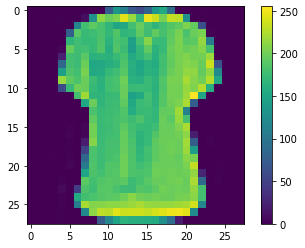

In [70]:
plt.imshow(train_images[55])
plt.colorbar()
plt.show()

In [71]:
train_images = train_images / 255.0

test_images = test_images / 255.0


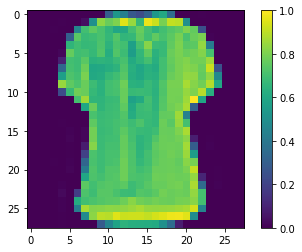

In [72]:
plt.imshow(train_images[55])
plt.colorbar()
plt.show()

In [90]:

# Build the model.
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(10),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(optimizer='RMSProp',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2365 - accuracy: 0.9219
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2328 - accuracy: 0.9219
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9244
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2297 - accuracy: 0.9260
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2271 - accuracy: 0.9264
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2224 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2226 - accuracy: 0.9288
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2194 - accuracy: 0.9287
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2165 - accuracy: 0.9305
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.212

In [94]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.6722 - accuracy: 0.8810 - 309ms/epoch - 987us/step

Test accuracy: 0.8809999823570251


вывод: одного Dense(128, activation='relu') достаточно для обучения accuracy до 0.89 на тестовой выботке. После чего начинается переобучении. Осой разницы нет какой оптимизатор выбрать, больше играет роль количество эпох. По всей видимости для датасета при таком подходе это предел.